In [30]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import coffea files -- signal and background

In [75]:
prefix = './coffea/skimmed/'

#suffix = 'BDT_v1_goodVtx_v10'
suffix = 'BDT_v4_goodVtx_v10_Tight'

In [76]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [77]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

## Signal

In [78]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [79]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [80]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [81]:
table = eff_cutflow
table.columns = cutnames

In [82]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [83]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [84]:
table = cts_cutflow
table.columns = cutnames

In [85]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.0355,23.2497,22.6538,22.6382,22.6382,22.4671,11.4270
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",653.3357,565.9179,550.5692,550.4106,550.4106,545.7087,340.6555
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",809.7825,701.1258,682.4434,682.0879,682.0879,677.1237,438.5269
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.1167,38.8657,37.6616,37.6491,37.6428,37.3623,23.0890
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,075.5539",919.8550,896.4311,896.0713,896.0713,889.0417,612.9964
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,439.8035","1,246.5330","1,211.0406","1,211.0406","1,211.0406","1,202.0942",868.3716
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",694.2471,599.8579,580.8584,580.8584,580.8584,575.7876,438.9285
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,067.0622","9,652.4573","9,369.6270","9,369.6270","9,369.6270","9,298.7876","5,763.8972"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,104.9556,89.1995,86.8710,86.8710,86.8710,86.6113,66.4486
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,184.5614","1,886.2087","1,836.7246","1,834.8219","1,834.8219","1,822.9316","1,407.5536"


In [86]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [87]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [88]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [89]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


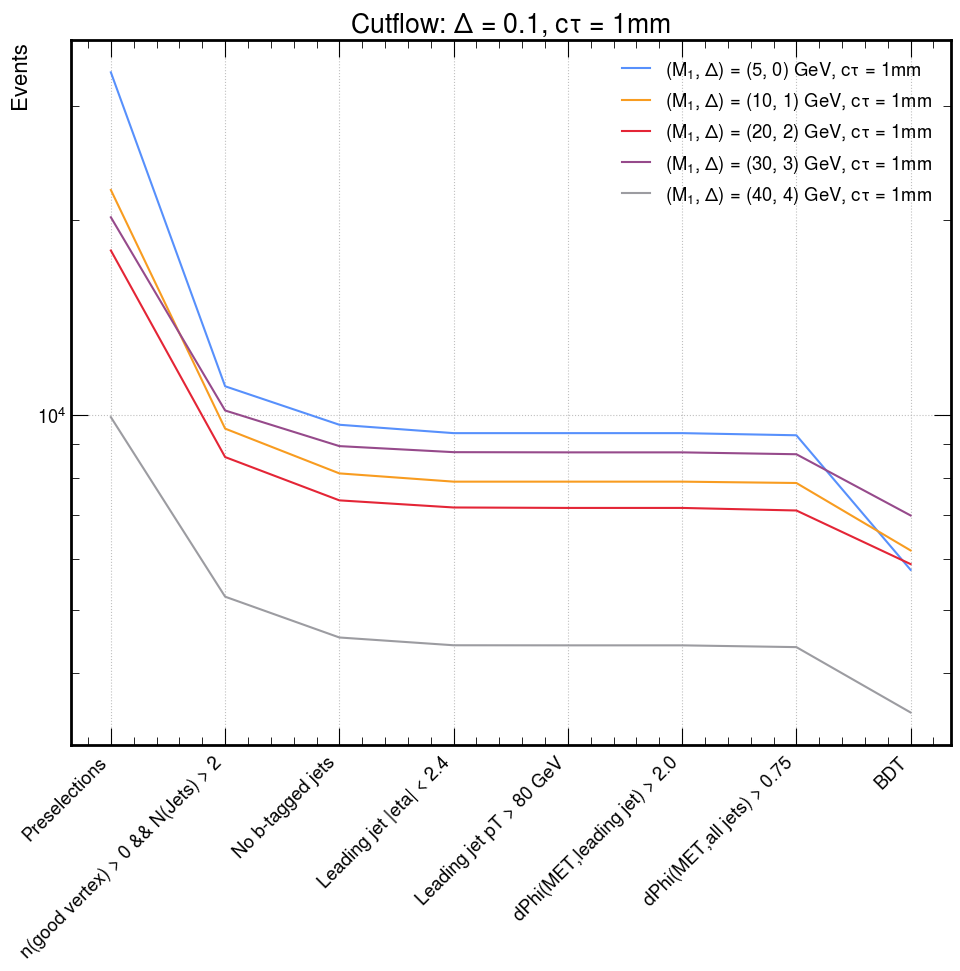

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


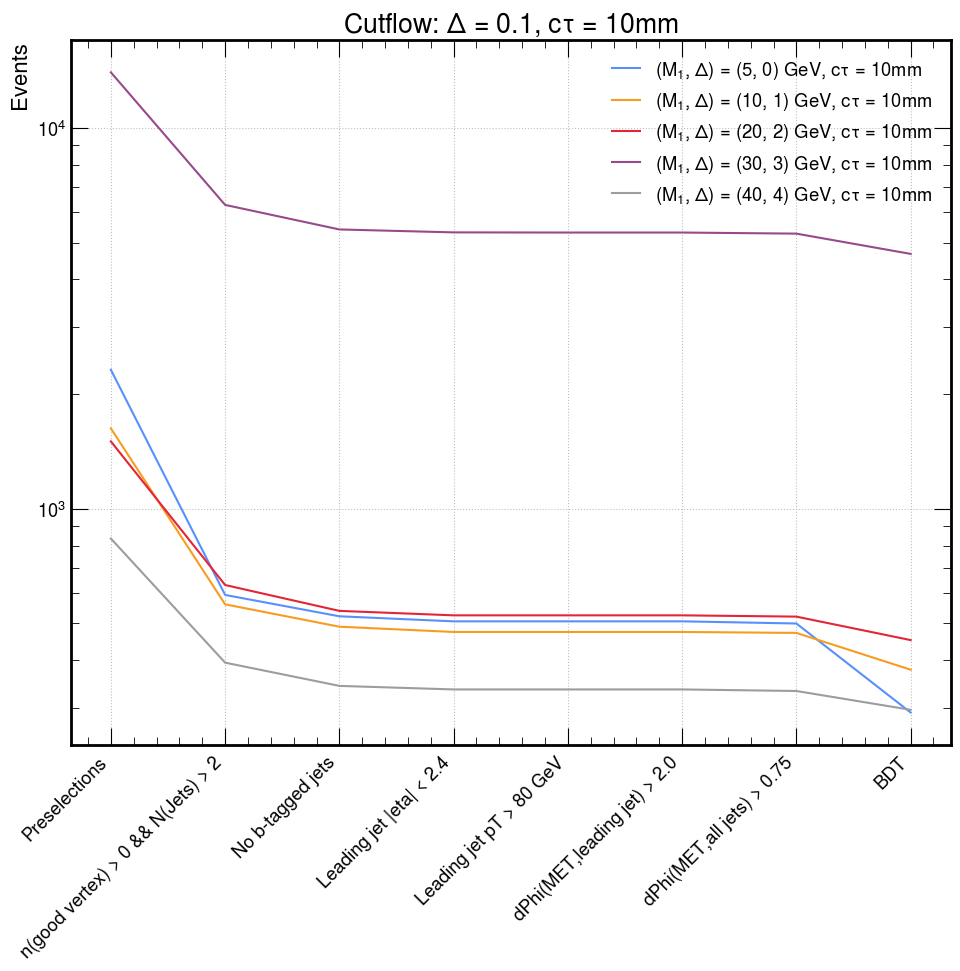

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


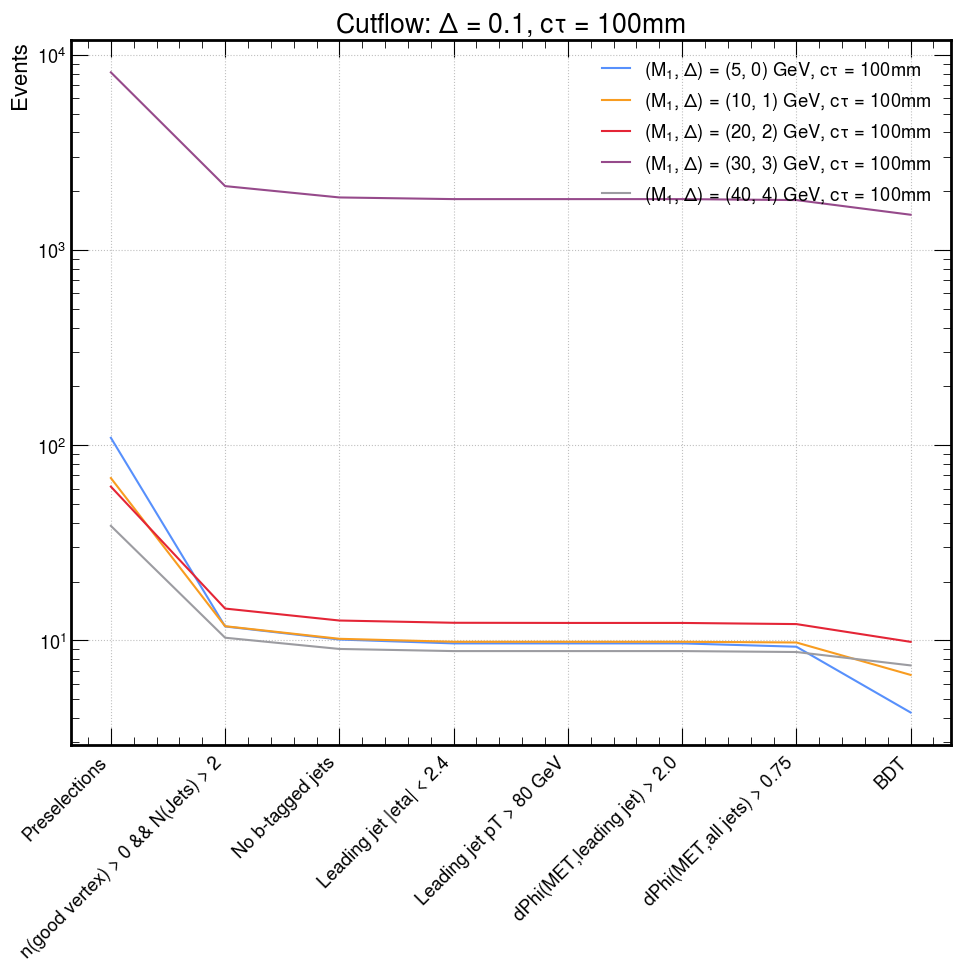

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


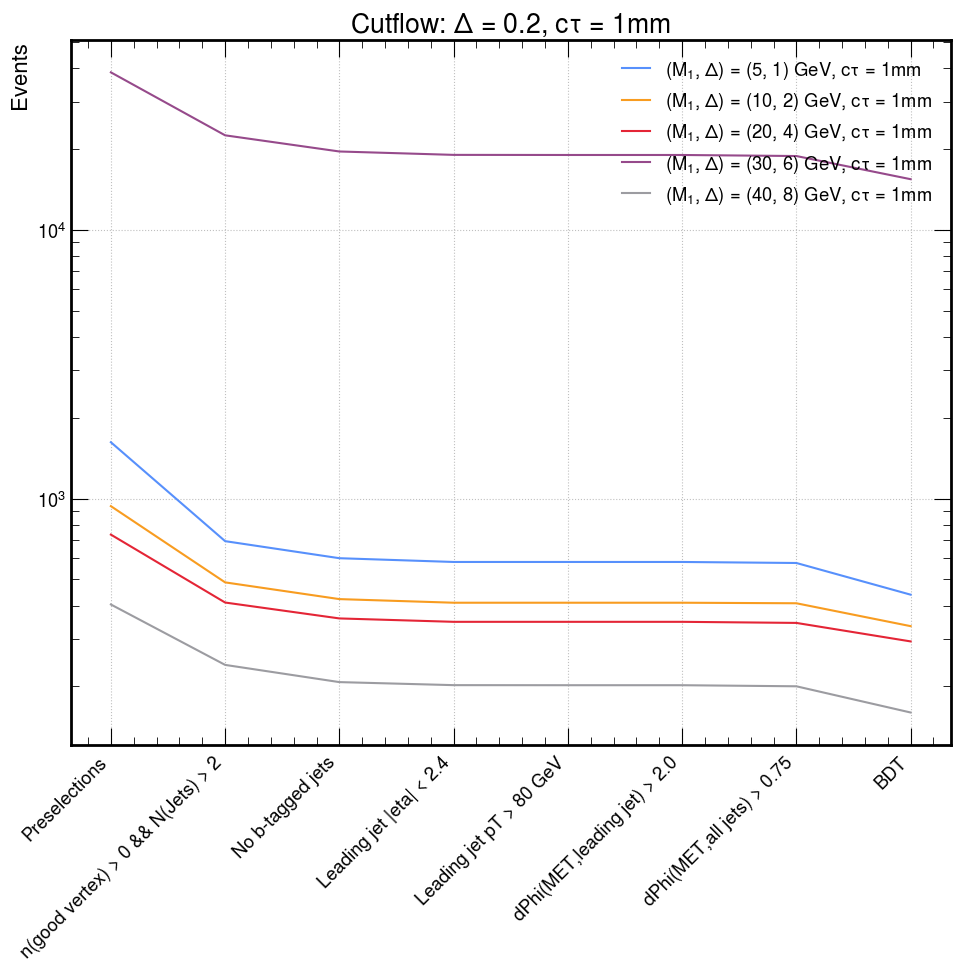

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


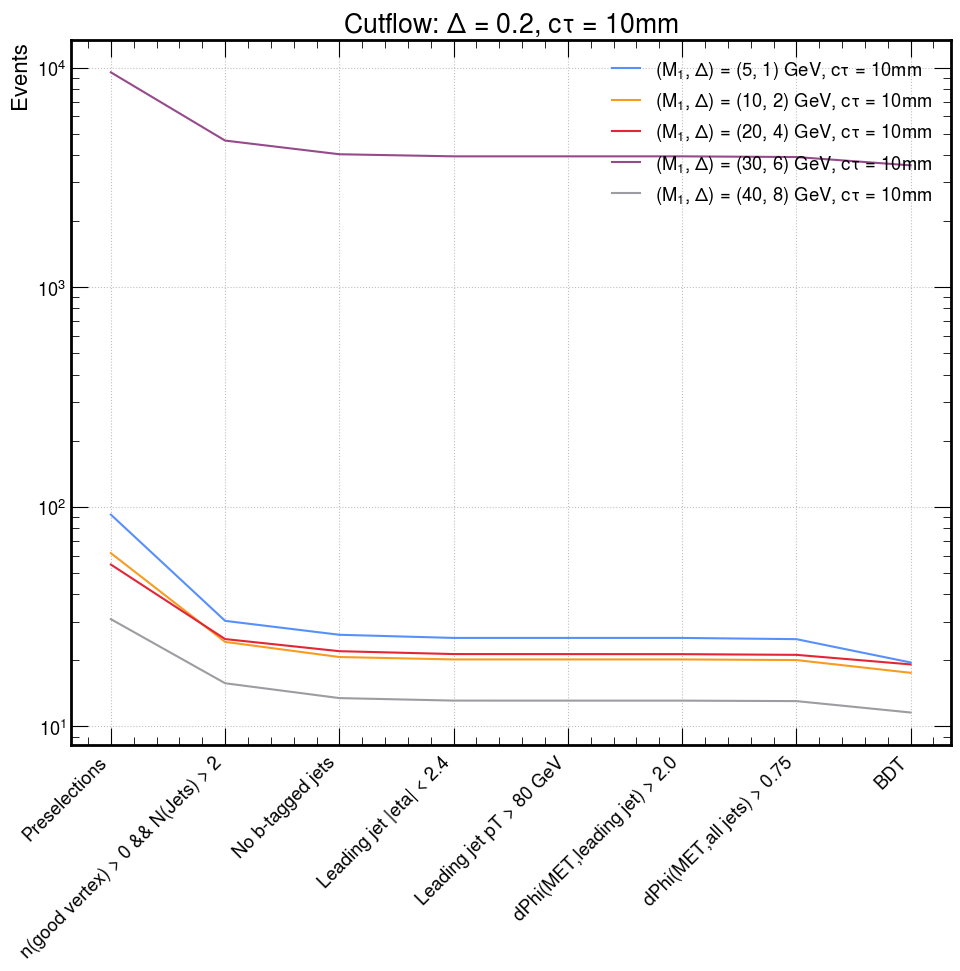

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


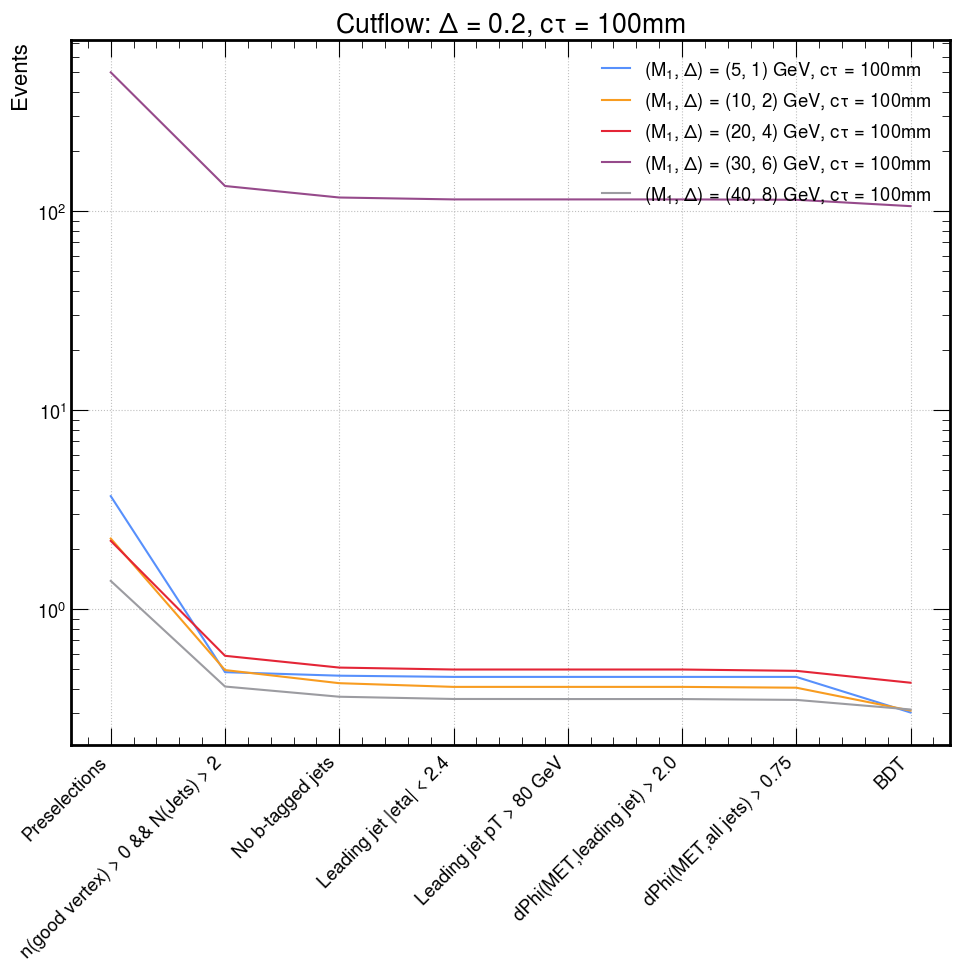

In [90]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


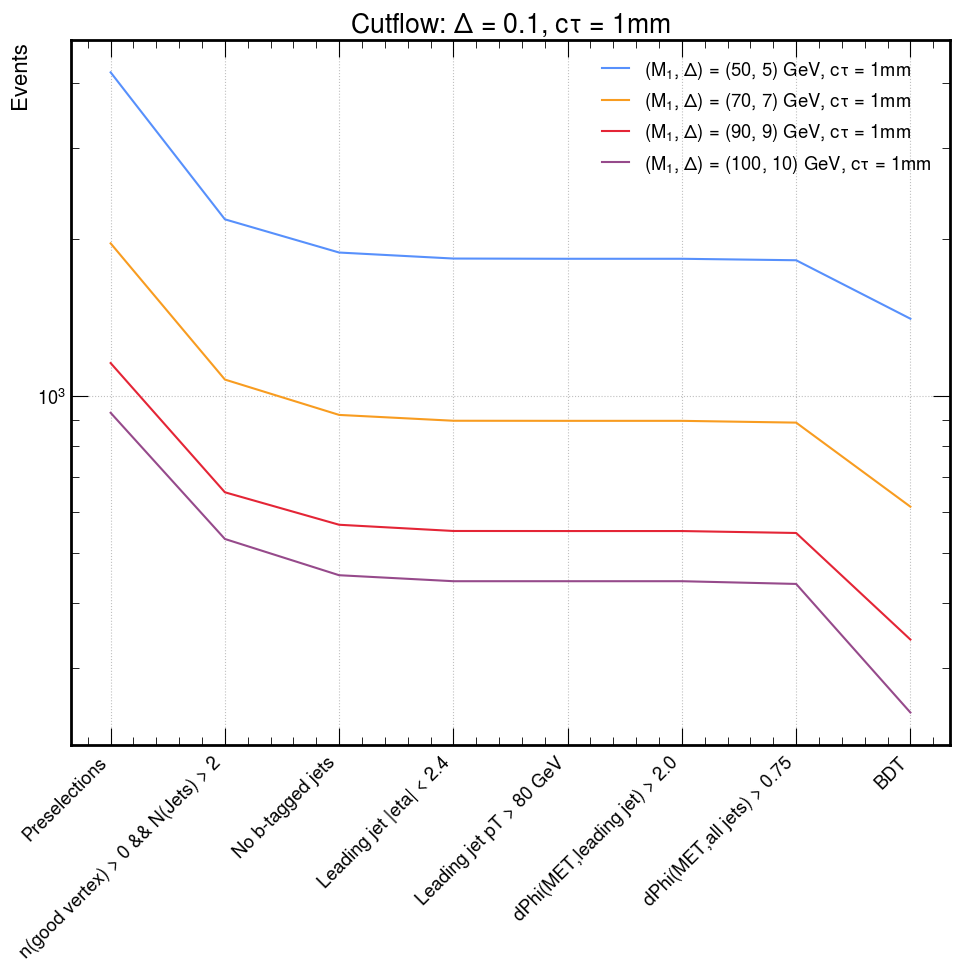

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


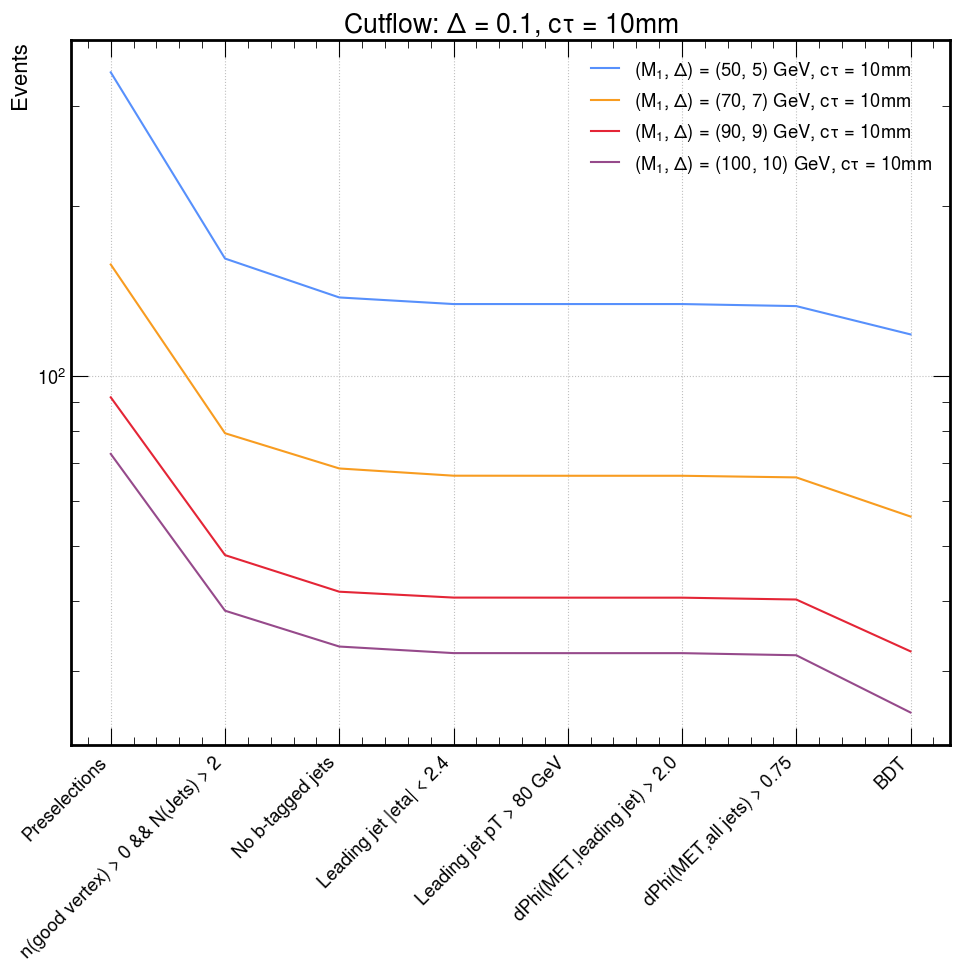

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


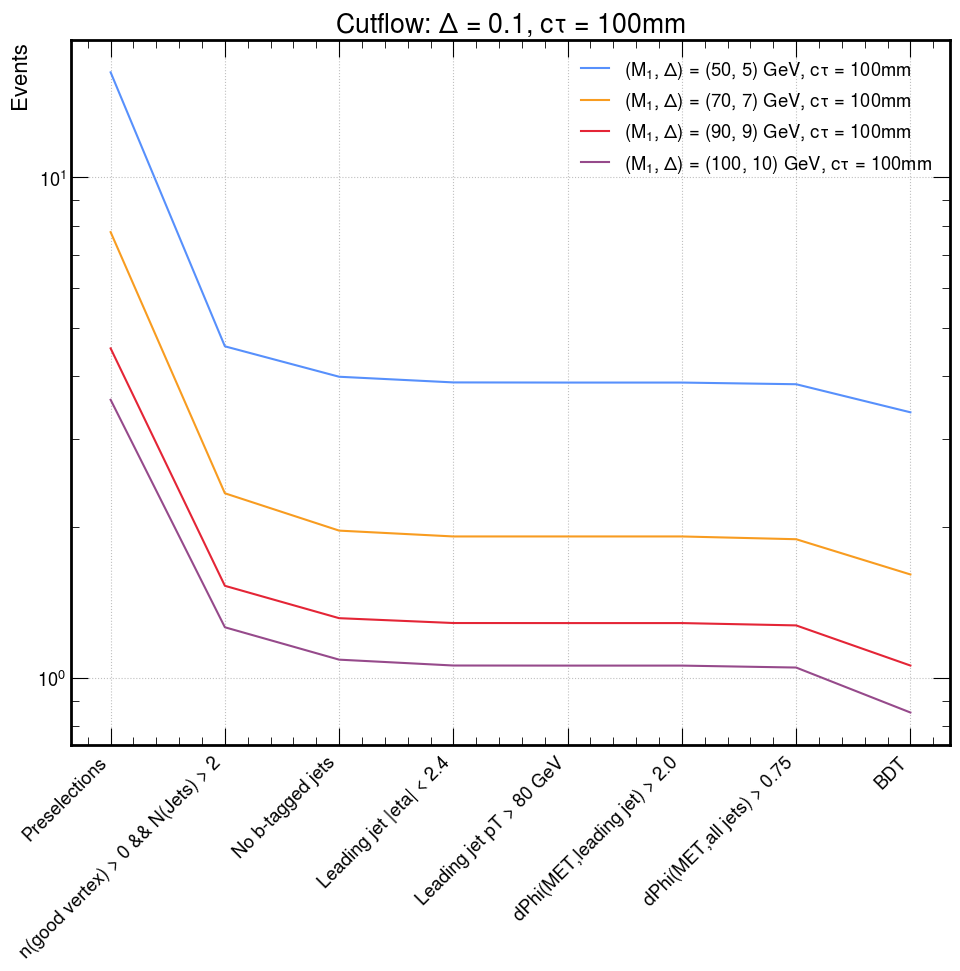

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


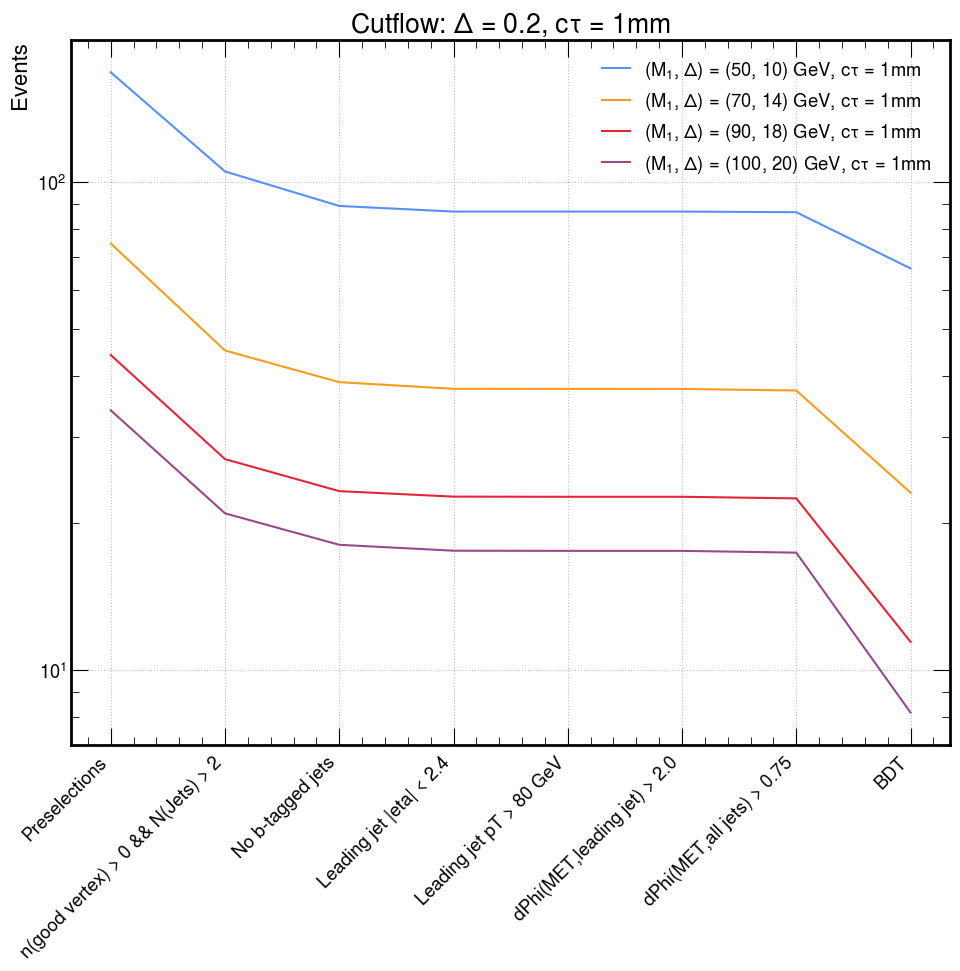

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


In [ ]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [ ]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

In [ ]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

In [ ]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

In [ ]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

In [ ]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

In [ ]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

In [ ]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

In [ ]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

In [ ]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [ ]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [ ]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

In [ ]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format


In [ ]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

In [ ]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [ ]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

In [ ]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

In [ ]:
ct = 1.0


In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
ct = 10.0


In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
ct = 100.0


In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show